## Portfolio 3

### 1. Introduction 

*Portfolio 3* is an exploratory data analysis of a project that aims to accurately forecast sales for Rossman, a company that operates several thousand drug stores across Europe. It will use two datasets that track the sales from 1,115 stores from January 2013 to September 2015. The data sets also list information such as the day/date, store model, holiday periods,  promotions, distance between stores etc. in order to better understand how both internal and external variables can impact sales.

Whiles sales forecasting is the end goal of this project, this phase of the project will focus on the preliminary phase of cleaning, wrangling, visualising, filtering, and exploring potential relationships in the data so that it may be accurately analysed and used to perform modelling and derive business conlusions. All steps taken during this process will be carefully considered, analysed and recorded, to ensure that the macro impact each step has on the data is fully understood. 

### 2. Ethical considerations 

This project has been carefully analysed from an ethical standpoint using widely recognised principles from thinkdotank [DataEthics.eu](https://dataethics.eu/data-ethics-principles/) and academics from [Oxford University & the University of Grenada](http://www.code-of-ethics.org/code-of-conduct/), to ensure that no harm or negative consequences (intended or unintended) will result from the collecting, storing, processing, sharing and presentation of this data. Principles & considerations that have been examined include:

1. The human being at the centre
2. Individual data control 
3. Transparency 
4. Accountability 
5. Equality 

(DataEthics.eu)

6. Lawfulness
7. Competence
8. Dealing with Data
9. Algorithms and models
10. Transparency Objectivity and Truth
11. Working alone and with others

(Grindrod & Moreno 2018)

These principles were not just considered before commencement of the project, but at every stage to ensure accuracy and accountability. While no ethical concerns have been raised before commencement of this project, all participants in this project will need to carefully consider their behaviour and decisions to ensure each principle is met at every stage of the project, particularly in relation to the handling, storing and accurate use of the data. The impact of alterations to the data was carefully considered at every step, particularly when data was deleted.

These principles will also be revisisted at the next phase of the project before modelling is performed. 

### 3. Variable explanation 

Provide a one line description of what each variable is, where not obvious.



- *'store':* unedited store dataset 
- *'train':* unedited train data set 
- *'data':* merged train & store data sets 
- *'data2':* dataframe checking for errors in 'Sales' and 'Open' columns 
- *'array1':* array of stores that experienced days with no sales despite being open 
- *'array2':* unique version of array1
- *'percent_missing':* percentage of missing values from each column 
- *'compul':* dataframe of missing values in 'CompetitionDistance' column 
- *'array3':* stores with missing values in 'CompetionDistance' column 
- *'statehol':* dataframe of stores affected by state holidays
- *'statehol2':* dataframe of stores still open on a state holiday 
- *'array4':* array of stores open on a state holiday 
- *'array5':* unique version of array4
- *'schoolhol':* dataframe of stores affected by school holiday 
- *'array6':* stores affected by school holiday 
- *'array7':* unique version of array6
- *'sales_outliers':* dataframe of outlier values from 'Sales' column
- *'store_1':* dataframe of sales for store 1 from December 2014
- *'store_25':* dataframe of sales for store 25 from December 2014
- *'store_827':* dataframe of sales for store 827 from December 2014
- *Id:* an Id that represents a (Store, Date) duple within the test set
- *Store:* a unique Id for each store
- *Sales:* the turnover for any given day (this is what you are predicting)
- *Customers:* the number of customers on a given day
- *Open:* an indicator for whether the store was open: 0 = closed, 1 = open
- *StateHoliday:* - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- *SchoolHoliday:* indicates if the (Store, Date) was affected by the closure of public schools
- *StoreType:* differentiates between 4 different store models: a, b, c, d
- *Assortment:* describes an assortment level: a = basic, b = extra, c = extended
- *CompetitionDistance:* distance in meters to the nearest competitor store
- *CompetitionOpenSince[Month/Year]:* gives the approximate year and month of the time the nearest competitor was opened
- *Promo:* indicates whether a store is running a promo on that day
- *Promo2:* Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- *Promo2Since[Year/Week]:* describes the year and calendar week when the store started participating in Promo2
- *PromoInterval:* describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### 4. Input

Read your data into Jupyter Notebook and save them in suitably named variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
store = pd.read_csv('store.csv')
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
train = pd.read_csv('train.csv')
train

/Users/jordangilmour/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### 5. Data summary 

Use codes to provide a summary of the data. Each step should be well documented and the form of the data should be clearly described including the shape, data types, info present in the data sets

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**Observation:**'train' has a total of 9 columns and 1017209 rows. There are no missing values. Most columns contain integers, with the exception of columns 'Date' and 'StateHoliday', which contain objects. 

In [5]:
train.shape

(1017209, 9)

In [6]:
train.size

9154881

**Observation:** 'train' has a total of 9154881 elements (rows x columns)

In [7]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [8]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [9]:
train.axes

[RangeIndex(start=0, stop=1017209, step=1),
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],
       dtype='object')]

In [10]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [12]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Observation:** Columns 3, 4, 5, 7, 8 and 9 contain missing values that must be rectified. 

In [13]:
store.shape

(1115, 10)

**Observation:** 'store' has 1115 rows and 10 columns

In [14]:
store.size

11150

In [15]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

**Observation:** 'store' contains 3 columns with object values, 2 columns with integer values, and 5 columns with floating point values. 

In [16]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
store.axes

[RangeIndex(start=0, stop=1115, step=1),
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
       dtype='object')]

In [18]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [19]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### 6. Merging of data sources

Merge your two data sources together using the correct parameters including a suitable index column and correct validation option. 

In [20]:
data = train.merge(store, on = 'Store', how = 'left', validate = 'many_to_one' )
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Explanation**: the 'store' dataset was merged into the 'train' dataset, as data in the "store" column from the 'store' dataset is unique. The data from this dataset can therefore be cleanly added to already existing data in the train dataset. Merging the two datasets with "store" as the main dataset would have resulted in a large loss of data from the 'train' data set. 

### 7. Summary statistics of the data

#### Variable data categories

- **Store:** nominal
- **DayOfWeek:** ordinal
- **Sales:** continuous
- **Customers:** continuous
- **Open:** nominal
- **Promo:** nominal
- **SchoolHoliday:** nominal
- **CompetitionDistance:** continuous
- **CompetitionOpenSinceMonth:** nominal
- **CompetitionOpenSinceYear:** ordinal
- **Promo2:** nominal
- **Promo2SinceWeek:** ordinal
- **Promo2SinceYear:** ordinal
- **Month:** ordinal
- **Year:** ordinal 

In [21]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


The "Customers", "Sales" and "CompetitionDistance" columns contain quantitative (continuous) data that we can use measures of spread & central tendency to understand. 

The values generated by the df.describe() function are clearly being influenced by the presence of outliers and missing values that will need to be dealt with. For example, the mean of the "Customers" column is only 6.33 - clearly an inaccurate average of distrubution. The "Sales" and "CompetitionDistance" columns have equally inaccurate values for most rows. Once the dataset has been cleaned, including missing values and outliers dealt with, the df.describe() method should return significantly different values to what is being displayed here. 

In [22]:
data.kurtosis()

/var/folders/90/wwvc584j4nb4lyh_26w5zmvh0000gn/T/ipykernel_1540/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


Store                         -1.200524
DayOfWeek                     -1.246873
Sales                          1.778375
Customers                      7.091773
Open                           1.090723
Promo                         -1.762018
SchoolHoliday                  0.815154
CompetitionDistance           13.000022
CompetitionOpenSinceMonth     -1.248357
CompetitionOpenSinceYear     121.934675
Promo2                        -1.999999
Promo2SinceWeek               -1.369929
Promo2SinceYear               -1.040662
dtype: float64

The "Customers" and "CompetitionDistance" columns both have kurtoses well above zero, meaning they are likley to have heavy tails and possibly extreme outliers. The "Sales" kurtosis is less extreme but nonetheless indicates the presence of outliers. 

In [23]:
data.skew()

/var/folders/90/wwvc584j4nb4lyh_26w5zmvh0000gn/T/ipykernel_1540/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Store                       -0.000955
DayOfWeek                    0.001593
Sales                        0.641460
Customers                    1.598650
Open                        -1.758045
Promo                        0.487838
SchoolHoliday                1.677842
CompetitionDistance          2.928534
CompetitionOpenSinceMonth   -0.169862
CompetitionOpenSinceYear    -7.539515
Promo2                      -0.002255
Promo2SinceWeek              0.104528
Promo2SinceYear             -0.120060
dtype: float64

All three columns of interest are positively skewed, meaning the distribution is not even and has a tail to the right. This should be visible once plotted in a historgram:

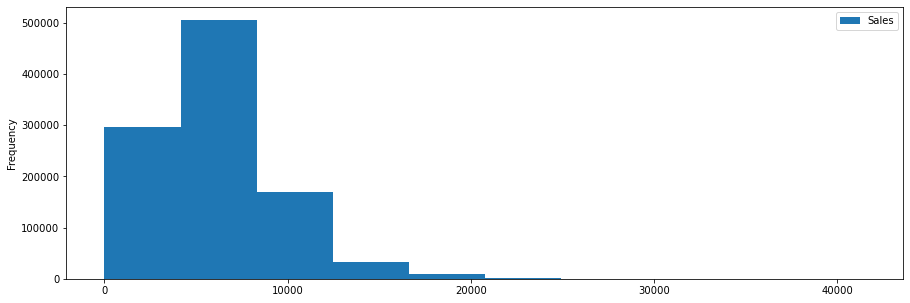

In [24]:
data.plot(y=["Sales"],kind="hist", figsize=(15,5))
plt.show()

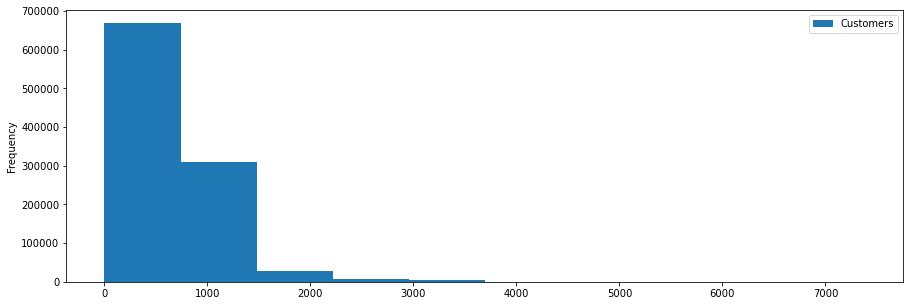

In [25]:
data.plot(y=["Customers"],kind="hist", figsize=(15,5))
plt.show()

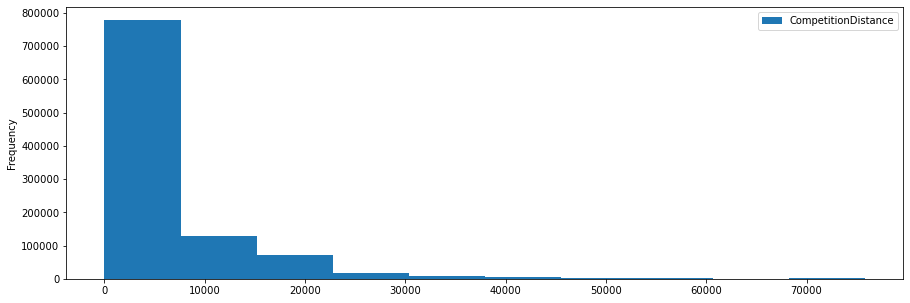

In [26]:
data.plot(y=["CompetitionDistance"],kind="hist", figsize=(15,5))
plt.show()

### 8. Data cleaning, wrangling & visualisation

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**Observation:** Columns 11, 12, 13, 15, 16, 17 have missing values. The exact number of missing values in each column are:

In [28]:
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [29]:
data2 = data[(data["Open"]==0) & (data["Sales"]!=0)]
data2.size

0

**Observation:** There are no rows with incorrect sales values while stores were closed

In [30]:
no_sales = data[(data["Open"]==1) & (data["Sales"]==0)]
no_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,a,a,180.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,NaN,NaN,NaN
340348,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN
340860,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,NaN,NaN,NaN
346734,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


In [31]:
no_sales.shape

(54, 18)

**Observation**: There are 54 rows where a store is open but has not recorded any sales.

In [32]:
no_sales[(no_sales["Customers"]!=0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
478649,1100,2,2014-04-29,0,3,1,1,0,0,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
889932,948,4,2013-04-25,0,5,1,1,0,0,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


**Observation:** There are two rows where a store was open, didn't record any sales, but lists customers. It is likely an error, so these rows will be dropped. 

In [33]:
data[(data["Customers"]!=0) & (data["Sales"]==0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
478649,1100,2,2014-04-29,0,3,1,1,0,0,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
889932,948,4,2013-04-25,0,5,1,1,0,0,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
data.drop(labels=[478649, 889932], axis=0, columns=None, level=None, inplace=True, errors='raise')

In [35]:
data.shape

(1017207, 18)

**Observation:** 'Data' now has 1017207 rows, meaning rows 478649 and 889932 have been successfully dropped. 

In [36]:
array1 = no_sales['Store'].values
array1

array([ 971,  674,  699,  708,  357,  227,  835,  835,  548,   28,   28,
         28,  102,  238,  303,  387,  882,  887,  102,  925,   57, 1017,
       1017, 1100, 1100,  661,  850,  986,  327,   25,   25,  623,  623,
        983,  983,  663,  391,  927, 1039, 1039,  665,  665,  700,  681,
        364,  364,  589,  948,  353,  259,  339,  339,  232,  762])

In [37]:
array2 = np.unique(array1) #unique list of stores that had days with no sales
array2

array([  25,   28,   57,  102,  227,  232,  238,  259,  303,  327,  339,
        353,  357,  364,  387,  391,  548,  589,  623,  661,  663,  665,
        674,  681,  699,  700,  708,  762,  835,  850,  882,  887,  925,
        927,  948,  971,  983,  986, 1017, 1039, 1100])

In [38]:
array2.size

41

**Observation**: 41 different stores experienced a day with no sales or customers. 

In [39]:
np.unique(array2, return_counts=True)

(array([  25,   28,   57,  102,  227,  232,  238,  259,  303,  327,  339,
         353,  357,  364,  387,  391,  548,  589,  623,  661,  663,  665,
         674,  681,  699,  700,  708,  762,  835,  850,  882,  887,  925,
         927,  948,  971,  983,  986, 1017, 1039, 1100]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

**Observation:** Of the 41 stores, most only experienced this phenominon once. Stores 28, 102, 339, 364, 623, 665, 835, 983, 1017, 1039 and 1100 experienced it twice, while store 28 experienced it 3 times. As it cannot be determined for sure if this data is a mistake or a true reflection of sales on these dates, the data will not be dropped. 

In [40]:
data[data["CompetitionOpenSinceMonth"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [41]:
data[data["CompetitionOpenSinceYear"].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [42]:
data[(data["CompetitionOpenSinceMonth"].isna()) & (data["CompetitionOpenSinceYear"].isna())]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Observation:** All rows that have a missing value from the "CompetitionOpenSinceMonth" column also have a missing value in the "CompetitionOpenSinceYear" column. 

In [43]:
data[(data["Promo2SinceWeek"].isna()) & (data["Promo2SinceYear"].isna()) & (data["PromoInterval"].isna())]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


**Observation:** Columns "Promo2SinceWeek", "Promo2SinceYear" and "PromoInterval" all have missing values from the same columns. 

In [44]:
data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


**Observation:** "data" has the same number of rows after drop_duplicates function is performed, meaning there are no duplictate rows or columns

In [45]:
percent_missing = data.isna().sum() * 100 / len(data)
percent_missing

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259731
CompetitionOpenSinceMonth    31.787630
CompetitionOpenSinceYear     31.787630
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

**Observation:** Rows with missing values in 'CompetitionDistance' make up less than a percent of the total data. Missing values in columns 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' make up over 30 percent, while missing values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' are present in almost half of the dataset. 

In [46]:
compnul = data[(data["CompetitionDistance"].isna())]
compnul

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [47]:
array3 = compnul['Store'].values
np.unique(array3, return_counts=True)

(array([291, 622, 879]), array([942, 942, 758]))

**Observation:** All missing values in the 'CompetitionDistance' column are from 3 stores: stores 291, 622, 879

In [48]:
data[(data["Store"]==291)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
2520,291,3,2015-07-29,8204,814,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
3635,291,2,2015-07-28,10374,943,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
4750,291,1,2015-07-27,11692,1086,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011925,291,6,2013-01-05,5316,552,1,0,0,0,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1013040,291,5,2013-01-04,7687,920,1,0,0,0,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1014155,291,4,2013-01-03,7285,871,1,0,0,0,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1015270,291,3,2013-01-02,7658,876,1,0,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [49]:
data[(data["Store"]==622)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
2851,622,3,2015-07-29,5326,468,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
3966,622,2,2015-07-28,4966,417,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
5081,622,1,2015-07-27,5413,517,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012256,622,6,2013-01-05,2350,258,1,0,0,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1013371,622,5,2013-01-04,3675,399,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1014486,622,4,2013-01-03,4085,419,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [50]:
data[(data["Store"]==879)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1993,879,4,2015-07-30,5861,426,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
3108,879,3,2015-07-29,5129,362,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
4223,879,2,2015-07-28,5320,389,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
5338,879,1,2015-07-27,5884,427,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012513,879,6,2013-01-05,3175,303,1,0,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1013628,879,5,2013-01-04,3160,343,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1014743,879,4,2013-01-03,3344,332,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


**Observation:** Stores 291, 622 and 879 have a missing value in the 'CompetitionDistance' column for every single entry. While the NaN values in 'CompetitionDistance' only make up less than a percent of the total dataset, dropping rows with this missing data will result in all data for stores 291, 622 and 879 being completely deleted. Dropping the entire column 'CompetitionDistance' when it is missing only 0.25% of entries, and could provide valuable insight into sales trends, is also not an appropriate option.

The missing values in this column will therefore be imputed with the median to avoid total data loss for 3 stores, which may impact the final analysis: 

In [51]:
compval = data[data["CompetitionDistance"].notna()] #dataframe without missing values in CompetitionDistance column 
compval["CompetitionDistance"].median() #calculates median for selected column 

2330.0

In [52]:
data.fillna(value={"CompetitionDistance": 2330}, inplace=True)
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323346
CompetitionOpenSinceYear     323346
Promo2                            0
Promo2SinceWeek              508030
Promo2SinceYear              508030
PromoInterval                508030
dtype: int64

In [53]:
data[data["CompetitionDistance"]==2330]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,2330.0,NaN,NaN,0,NaN,NaN,NaN
548,549,5,2015-07-31,6023,650,1,1,0,1,a,c,2330.0,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,2330.0,NaN,NaN,0,NaN,NaN,NaN
850,851,5,2015-07-31,6305,476,1,1,0,0,d,c,2330.0,NaN,NaN,1,49.0,2014.0,"Mar,Jun,Sept,Dec"
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,2330.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016643,549,2,2013-01-01,0,0,0,0,a,1,a,c,2330.0,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,2330.0,NaN,NaN,0,NaN,NaN,NaN
1016945,851,2,2013-01-01,0,0,0,0,a,1,d,c,2330.0,NaN,NaN,1,49.0,2014.0,"Mar,Jun,Sept,Dec"
1016973,879,2,2013-01-01,0,0,0,0,a,1,d,a,2330.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [54]:
data[data["Promo2"]==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [55]:
data[(data["Promo2"]==0) & (data["Promo2SinceWeek"].isna()) & (data["Promo2SinceYear"].isna()) & (data["PromoInterval"].isna())]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


**Observation:** Stores that are not participating in Promo 2 make up the missing values in 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval', as expected. Stores that are not participating in Promo 2 make up almost half of the data in the 'data' dataframe, meaning dropping rows with NaN values from these columns is not an option. 

The validity and usefulness of each of these columns will be considered in the 'Data wrangling' phase of this portfolio. For now, the missing values will be imputed with the string identifier 'N/A' to avoid mass data loss.

In [56]:
data.fillna(value={"Promo2SinceWeek": "N/A"}, inplace=True)

In [57]:
data.fillna(value={"Promo2SinceYear": "N/A"}, inplace=True)

In [58]:
data.fillna(value={"PromoInterval": "N/A"}, inplace=True)

In [59]:
data.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323346
CompetitionOpenSinceYear     323346
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

**Observation:** 'Promo2SinceWeek', 'Promo2SinceYear' and 'PromoInterval' now contain no missing values.


As deleting the rows with missing values from 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' would remove more than 30 percent of the data, those missing values will also be imputed with the string identifier 'No Entry'.  

In [60]:
data.fillna(value={"CompetitionOpenSinceMonth": "No Entry"}, inplace=True)

In [61]:
data.fillna(value={"CompetitionOpenSinceYear": "No Entry"}, inplace=True)

In [62]:
data.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Observation:** There are no more missing values in 'data'. 

In [63]:
data["PromoInterval"] = data["PromoInterval"].str.lower() #convert strings to lower case, in case there are discrepencies
data["PromoInterval"]

0                       n/a
1           jan,apr,jul,oct
2           jan,apr,jul,oct
3                       n/a
4                       n/a
                 ...       
1017204     jan,apr,jul,oct
1017205                 n/a
1017206                 n/a
1017207                 n/a
1017208    mar,jun,sept,dec
Name: PromoInterval, Length: 1017207, dtype: object

In [64]:
statehol = data[(data["StateHoliday"] != '0')] #stores affected by public holiday 
statehol.shape

(162122, 18)

In [65]:
statehol2 = statehol[(statehol["Open"] == 1)] #stores still open on a public holiday  
statehol2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
63559,5,4,2015-06-04,5807,625,1,1,a,0,a,a,29910.0,4.0,2015.0,0,N/A,N/A,n/a
63560,6,4,2015-06-04,5749,614,1,1,a,0,a,a,310.0,12.0,2013.0,0,N/A,N/A,n/a
63609,55,4,2015-06-04,5984,702,1,1,a,0,a,a,720.0,11.0,2004.0,0,N/A,N/A,n/a
63611,57,4,2015-06-04,9301,870,1,1,a,0,d,c,420.0,6.0,2014.0,0,N/A,N/A,n/a
63614,60,4,2015-06-04,10399,850,1,1,a,0,d,c,5540.0,10.0,2009.0,0,N/A,N/A,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,N/A,N/A,n/a
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,N/A,N/A,n/a
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,No Entry,No Entry,1,48.0,2012.0,"jan,apr,jul,oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,No Entry,No Entry,0,N/A,N/A,n/a


In [66]:
array4 = statehol2['Store'].values
array5 = np.unique(array3, return_counts=True)
array5

(array([291, 622, 879]), array([942, 942, 758]))

In [67]:
len(array5[0])

3

In [68]:
a = 162122/len(data)*100 #percentage of columns with data from a public holiday 
a

15.937955598024786

In [69]:
113050/len(statehol)*100 #percentage of state holiday dates where stores were open 

69.73143681918556

**Observation:** The 'StateHoliday' column indicates that 19% of the data was collected on public holidays. Of that data, 69.73% includes days where stores were open and trading, while the remaining 30% the stores are closed. While state holidays are an external factor that cannot be changed, the column 'StateHoliday' will be kept as the influence of state holidays on sales may influence business decisions on those days (like whether or not it is worth opening the store in the first place).   

**Observation:**

In [70]:
data[(data["SchoolHoliday"] == 1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"jan,apr,jul,oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"jan,apr,jul,oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,N/A,N/A,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"jan,apr,jul,oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,N/A,N/A,n/a
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,No Entry,No Entry,0,N/A,N/A,n/a
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,No Entry,No Entry,0,N/A,N/A,n/a


In [71]:
181721/len(data)*100 # percentage of data on school holidays

17.86470207145645

In [72]:
schoolhol = data[(data["SchoolHoliday"] == 1)]
schoolhol.shape

(181721, 18)

In [73]:
array6 = schoolhol['Store'].values
array7 = np.unique(array6, return_counts=True)
array7

(array([   1,    2,    3, ..., 1113, 1114, 1115]),
 array([193, 167, 170, ..., 159, 169, 193]))

In [74]:
len(array7[0])

1115

**Observation**: It is unclear what the variables in 'SchoolHol' mean, but it is assumed 1 = affected by a school holiday, while 0 = not affected. 21.5% of the data collected is on a school holiday. School holidays are usually consistent every year, meaning they could potentially have a regular impact on sales. This column will therefore be kept. 

In [75]:
data[(data["Open"]==0)] #rows where stores aren't open

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,N/A,N/A,n/a
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"feb,may,aug,nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,N/A,N/A,n/a
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"feb,may,aug,nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,N/A,N/A,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"jan,apr,jul,oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,N/A,N/A,n/a
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,No Entry,No Entry,0,N/A,N/A,n/a
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,No Entry,No Entry,0,N/A,N/A,n/a


In [76]:
172817/len(data)*100 # percentage of rows with no data because stores aren't open

16.989364013421064

**Observation:** 16% of rows have no data because the store wasn't open. These will be deleted, along with the 'Open' column as it is no longer needed. 

In [77]:
data = data[data.Open == 1] #dropping rows where stores are closed
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"jan,apr,jul,oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"jan,apr,jul,oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,N/A,N/A,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,N/A,N/A,n/a
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,N/A,N/A,n/a
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,No Entry,No Entry,1,48.0,2012.0,"jan,apr,jul,oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,No Entry,No Entry,0,N/A,N/A,n/a


In [78]:
data = data.drop(columns = "Open") #deleting 'Open' row
data

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"jan,apr,jul,oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"jan,apr,jul,oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,N/A,N/A,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,N/A,N/A,n/a
1016827,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,N/A,N/A,n/a
1016863,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,No Entry,No Entry,1,48.0,2012.0,"jan,apr,jul,oct"
1017042,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,No Entry,No Entry,0,N/A,N/A,n/a


In [79]:
dates = pd.to_datetime(data["Date"], errors='raise', format='%Y-%m-%d')
dates

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1016776   2013-01-01
1016827   2013-01-01
1016863   2013-01-01
1017042   2013-01-01
1017190   2013-01-01
Name: Date, Length: 844390, dtype: datetime64[ns]

In [80]:
data["Date"] = dates  #saving DateTime change into 'data'

In [81]:
data["Dt_day"] = data["Date"].dt.day_name() #creating column for DT day, there's already a column with integers
data["Month"]= data["Date"].dt.month #creating column for DT month 
data["Year"] = data["Date"].dt.year #creating column for DT year
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Friday,7,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"jan,apr,jul,oct",Friday,7,2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"jan,apr,jul,oct",Friday,7,2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a,Friday,7,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,N/A,N/A,n/a,Friday,7,2015


In [82]:
data[['DayOfWeek', 'Dt_day', 'Month']] #integers appear to match datetime names

,DayOfWeek,Dt_day,Month
0,5,Friday,7
1,5,Friday,7
2,5,Friday,7
3,5,Friday,7
4,5,Friday,7
...,...,...,...
1016776,2,Tuesday,1
1016827,2,Tuesday,1
1016863,2,Tuesday,1
1017042,2,Tuesday,1


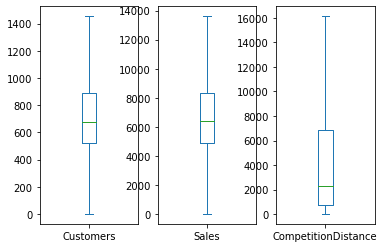

In [117]:
outliers = data.plot(y=["Customers","Sales","CompetitionDistance"], layout = (1,3), subplots=True, kind="box")
 
plt.show()

All three columns appear to have a number of outliers that distort important calculations used for understanding the data. 

In [84]:
def calculate_outlier(df,column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [85]:
col = "Sales"
lower_ins,upper_ins = calculate_outlier(data,col)
print(lower_ins,upper_ins)
 
data[(data[col]>upper_ins) | (data[col]<lower_ins)].count()

-392.5 13611.5


Store                        30769
DayOfWeek                    30769
Date                         30769
Sales                        30769
Customers                    30769
Promo                        30769
StateHoliday                 30769
SchoolHoliday                30769
StoreType                    30769
Assortment                   30769
CompetitionDistance          30769
CompetitionOpenSinceMonth    30769
CompetitionOpenSinceYear     30769
Promo2                       30769
Promo2SinceWeek              30769
Promo2SinceYear              30769
PromoInterval                30769
Dt_day                       30769
Month                        30769
Year                         30769
dtype: int64

There are 30769 outliers in the "Sales" column. Anything above 13611.5 or below -392.5 is an outlier - as the lowest sale value is 0, all 30769 outliers are above the acceptable range. 

In [86]:
sales_outliers = data[(data[col]>upper_ins) | (data[col]<lower_ins)]
sales_outliers.nlargest(10,["Sales"])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
44393,909,1,2015-06-22,41551,1721,0,0,0,a,c,1680.0,No Entry,No Entry,1,45.0,2009.0,"feb,may,aug,nov",Monday,6,2015
132946,262,5,2015-04-03,38722,5132,1,b,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Friday,4,2015
101726,262,5,2015-05-01,38484,5458,1,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Friday,5,2015
87231,262,4,2015-05-14,38367,5192,0,a,1,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Thursday,5,2015
424086,57,1,2014-06-16,38037,1970,1,0,0,d,c,420.0,6.0,2014.0,0,N/A,N/A,n/a,Monday,6,2014
627776,817,1,2013-12-16,38025,4381,1,0,0,a,a,140.0,3.0,2006.0,0,N/A,N/A,n/a,Monday,12,2013
627220,261,1,2013-12-16,37646,1964,1,0,0,d,c,15340.0,4.0,2015.0,1,39.0,2009.0,"jan,apr,jul,oct",Monday,12,2013
444361,262,4,2014-05-29,37403,5297,0,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Thursday,5,2014
620531,262,7,2013-12-22,37376,4916,0,0,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Sunday,12,2013
245945,262,7,2014-12-21,37122,4962,0,0,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Sunday,12,2014


The largest outlier is 41551

In [87]:
sales_outliers.nsmallest(10,["Sales"])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
30617,513,6,2015-07-04,13612,1596,0,0,0,a,a,400.0,8.0,2013.0,0,N/A,N/A,n/a,Saturday,7,2015
64883,214,3,2015-06-03,13612,923,1,0,0,d,a,8650.0,7.0,2013.0,1,10.0,2014.0,"jan,apr,jul,oct",Wednesday,6,2015
181173,544,4,2015-02-19,13612,1708,1,0,1,a,a,250.0,12.0,2001.0,1,13.0,2010.0,"jan,apr,jul,oct",Thursday,2,2015
289186,532,3,2014-11-05,13612,1529,1,0,0,a,c,1070.0,8.0,2010.0,0,N/A,N/A,n/a,Wednesday,11,2014
307870,513,4,2014-10-16,13612,1700,0,0,0,a,a,400.0,8.0,2013.0,0,N/A,N/A,n/a,Thursday,10,2014
320906,449,4,2014-10-02,13612,1852,1,0,0,a,c,120.0,12.0,2014.0,1,37.0,2009.0,"jan,apr,jul,oct",Thursday,10,2014
507888,234,3,2014-04-02,13612,1141,1,0,0,d,a,4370.0,No Entry,No Entry,0,N/A,N/A,n/a,Wednesday,4,2014
584377,903,5,2014-01-24,13612,875,1,0,0,d,c,7290.0,9.0,2014.0,0,N/A,N/A,n/a,Friday,1,2014
604212,668,1,2014-01-06,13612,1487,1,0,0,c,a,1270.0,9.0,2010.0,0,N/A,N/A,n/a,Monday,1,2014
810321,502,5,2013-07-05,13612,1820,1,0,0,a,a,220.0,2.0,2002.0,1,37.0,2009.0,"jan,apr,jul,oct",Friday,7,2013


The smallest outlier is 13612

As there were no outliers below the lower range, the outlier values will be imputed with the upper range value instead of the median value. This is because imputing with the highest possible value will ensure that these values remain high without overly influencing calculations to be made on the data set. Imputing with a lower value (like the median) could skew the data too far the other way by implying average sales were far lower than they actually were. 

In [88]:
data.loc[(data[col]>upper_ins) | 
(data[col]<lower_ins),col] = upper_ins

In [89]:
data.nlargest(6,["Sales"])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
3,4,5,2015-07-31,13611.5,1498,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a,Friday,7,2015
6,7,5,2015-07-31,13611.5,1414,1,0,1,a,c,24000.0,4.0,2013.0,0,N/A,N/A,n/a,Friday,7,2015
23,24,5,2015-07-31,13611.5,1082,1,0,1,a,c,4590.0,3.0,2000.0,1,40.0,2011.0,"jan,apr,jul,oct",Friday,7,2015
24,25,5,2015-07-31,13611.5,1586,1,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Friday,7,2015
83,84,5,2015-07-31,13611.5,1439,1,0,1,a,c,11810.0,8.0,2014.0,0,N/A,N/A,n/a,Friday,7,2015
107,108,5,2015-07-31,13611.5,992,1,0,0,d,c,2190.0,9.0,2003.0,0,N/A,N/A,n/a,Friday,7,2015


In [90]:
data[(data[col]>upper_ins) | 
(data[col]<lower_ins)].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Dt_day                       0
Month                        0
Year                         0
dtype: int64

Outliers have been removed from the 'Sales' column

In [91]:
col = "Customers"
lower_ins,upper_ins = calculate_outlier(data,col)
print(lower_ins,upper_ins)
 
data[(data[col]>upper_ins) | (data[col]<lower_ins)].count()

-42.0 1454.0


Store                        40853
DayOfWeek                    40853
Date                         40853
Sales                        40853
Customers                    40853
Promo                        40853
StateHoliday                 40853
SchoolHoliday                40853
StoreType                    40853
Assortment                   40853
CompetitionDistance          40853
CompetitionOpenSinceMonth    40853
CompetitionOpenSinceYear     40853
Promo2                       40853
Promo2SinceWeek              40853
Promo2SinceYear              40853
PromoInterval                40853
Dt_day                       40853
Month                        40853
Year                         40853
dtype: int64

Values above 1454 and below -42 are considered outliers for the "Customers" column. There are 40853 outliers. All outliers are once again above the maximum range, as the lowest possible customer count is 0. 

In [92]:
data.nlargest(10,["Customers"])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
993496,817,2,2013-01-22,13611.5,7388,1,0,0,a,a,140.0,3.0,2006.0,0,N/A,N/A,n/a,Tuesday,1,2013
319810,262,5,2014-10-03,13611.5,5494,1,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Friday,10,2014
101726,262,5,2015-05-01,13611.5,5458,1,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Friday,5,2015
432096,262,1,2014-06-09,13611.5,5387,0,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Monday,6,2014
444361,262,4,2014-05-29,13611.5,5297,0,a,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Thursday,5,2014
87231,262,4,2015-05-14,13611.5,5192,0,a,1,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Thursday,5,2015
129601,262,1,2015-04-06,13611.5,5152,0,b,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Monday,4,2015
745411,262,7,2013-09-01,13611.5,5145,0,0,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Sunday,9,2013
132946,262,5,2015-04-03,13611.5,5132,1,b,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Friday,4,2015
776631,262,7,2013-08-04,13611.5,5112,0,0,0,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Sunday,8,2013


The largest outlier is 7388.

In [93]:
customer_outliers = data[(data[col]>upper_ins) | (data[col]<lower_ins)]
customer_outliers

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
3,4,5,2015-07-31,13611.5,1498,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a,Friday,7,2015
24,25,5,2015-07-31,13611.5,1586,1,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Friday,7,2015
124,125,5,2015-07-31,13611.5,2041,1,0,1,a,a,760.0,12.0,2005.0,0,N/A,N/A,n/a,Friday,7,2015
210,211,5,2015-07-31,13611.5,1659,1,0,1,a,c,350.0,11.0,2006.0,0,N/A,N/A,n/a,Friday,7,2015
250,251,5,2015-07-31,13611.5,2508,1,0,1,a,c,340.0,No Entry,No Entry,0,N/A,N/A,n/a,Friday,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016093,1114,3,2013-01-02,13611.5,3401,0,0,1,a,c,870.0,No Entry,No Entry,0,N/A,N/A,n/a,Wednesday,1,2013
1016356,262,2,2013-01-01,13611.5,2875,0,a,1,b,a,1180.0,5.0,2013.0,0,N/A,N/A,n/a,Tuesday,1,2013
1016517,423,2,2013-01-01,9643.0,1751,0,a,1,b,a,1270.0,5.0,2014.0,0,N/A,N/A,n/a,Tuesday,1,2013
1016656,562,2,2013-01-01,8498.0,1675,0,a,1,b,c,1210.0,No Entry,No Entry,0,N/A,N/A,n/a,Tuesday,1,2013


In [94]:
arr10 = customer_outliers["Store"].values

In [95]:
arr11 = np.unique(arr10, return_counts=True)
arr11

(array([   3,    4,    7,   11,   12,   17,   24,   25,   27,   28,   33,
          34,   35,   36,   37,   42,   47,   54,   57,   64,   68,   69,
          71,   74,   76,   82,   84,   85,   90,   95,  100,  102,  104,
         106,  107,  108,  109,  112,  122,  123,  125,  129,  133,  137,
         140,  144,  145,  147,  150,  154,  157,  163,  166,  167,  168,
         171,  173,  178,  179,  180,  187,  189,  193,  195,  197,  200,
         203,  205,  207,  211,  214,  216,  227,  229,  230,  233,  234,
         236,  238,  243,  245,  246,  247,  248,  251,  252,  256,  259,
         261,  262,  264,  267,  269,  270,  271,  274,  278,  279,  291,
         298,  299,  300,  304,  308,  316,  318,  319,  320,  327,  333,
         335,  336,  342,  343,  344,  348,  349,  353,  355,  357,  358,
         362,  372,  375,  376,  377,  378,  380,  381,  382,  383,  384,
         387,  388,  389,  390,  391,  394,  396,  397,  400,  402,  403,
         416,  421,  423,  430,  431, 

In [96]:
np.sort(arr11, axis=-1, kind='quicksort', order=None)

array([[   3,    4,    7,   11,   12,   17,   24,   25,   27,   28,   33,
          34,   35,   36,   37,   42,   47,   54,   57,   64,   68,   69,
          71,   74,   76,   82,   84,   85,   90,   95,  100,  102,  104,
         106,  107,  108,  109,  112,  122,  123,  125,  129,  133,  137,
         140,  144,  145,  147,  150,  154,  157,  163,  166,  167,  168,
         171,  173,  178,  179,  180,  187,  189,  193,  195,  197,  200,
         203,  205,  207,  211,  214,  216,  227,  229,  230,  233,  234,
         236,  238,  243,  245,  246,  247,  248,  251,  252,  256,  259,
         261,  262,  264,  267,  269,  270,  271,  274,  278,  279,  291,
         298,  299,  300,  304,  308,  316,  318,  319,  320,  327,  333,
         335,  336,  342,  343,  344,  348,  349,  353,  355,  357,  358,
         362,  372,  375,  376,  377,  378,  380,  381,  382,  383,  384,
         387,  388,  389,  390,  391,  394,  396,  397,  400,  402,  403,
         416,  421,  423,  430,  431, 

In [97]:
len(arr11[0])

419

419 different stores experienced sales above the upper range, some once, some hundreds of times. 

As there are once again no outliers below the lower range, the outlier values will be imputed with the upper range value instead of the median value, for the same reasons used for the 'Sales' column.  

In [98]:
data.loc[(data[col]>upper_ins) | 
(data[col]<lower_ins),col] = upper_ins

In [99]:
data.nlargest(5,['Customers'])

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
3,4,5,2015-07-31,13611.5,1454,1,0,1,c,c,620.0,9.0,2009.0,0,N/A,N/A,n/a,Friday,7,2015
24,25,5,2015-07-31,13611.5,1454,1,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Friday,7,2015
124,125,5,2015-07-31,13611.5,1454,1,0,1,a,a,760.0,12.0,2005.0,0,N/A,N/A,n/a,Friday,7,2015
210,211,5,2015-07-31,13611.5,1454,1,0,1,a,c,350.0,11.0,2006.0,0,N/A,N/A,n/a,Friday,7,2015
250,251,5,2015-07-31,13611.5,1454,1,0,1,a,c,340.0,No Entry,No Entry,0,N/A,N/A,n/a,Friday,7,2015


In [100]:
data[(data[col]>upper_ins) | 
(data[col]<lower_ins)].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Dt_day                       0
Month                        0
Year                         0
dtype: int64

Outliers have been removed from the 'Customers' column. 

In [101]:
col = "CompetitionDistance"
lower_ins,upper_ins = calculate_outlier(data,col)
print(lower_ins,upper_ins)
 
data[(data[col]>upper_ins) | (data[col]<lower_ins)].count()

-8545.0 16135.0


Store                        83041
DayOfWeek                    83041
Date                         83041
Sales                        83041
Customers                    83041
Promo                        83041
StateHoliday                 83041
SchoolHoliday                83041
StoreType                    83041
Assortment                   83041
CompetitionDistance          83041
CompetitionOpenSinceMonth    83041
CompetitionOpenSinceYear     83041
Promo2                       83041
Promo2SinceWeek              83041
Promo2SinceYear              83041
PromoInterval                83041
Dt_day                       83041
Month                        83041
Year                         83041
dtype: int64

Anything above 16135 is an outlier in the "CompetitionDistance" column. There are 83041 outliers. As all outliers are once again above the upper range, outliers will be imputed with the upper range. 

In [102]:
data.loc[(data[col]>upper_ins) | 
(data[col]<lower_ins),col] = upper_ins

In [103]:
data[(data[col]>upper_ins) | 
(data[col]<lower_ins)].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Dt_day                       0
Month                        0
Year                         0
dtype: int64

Outliers have been successfully removed.

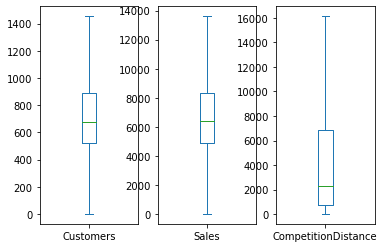

In [104]:
data.plot(y=["Customers","Sales", "CompetitionDistance"], layout = (1,3), subplots=True, kind="box")
 
plt.show()

Boxplots of each column now show no outliers.

In [105]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,Year
count,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000,844390.000000
mean,558.421817,3.520363,6840.657906,734.789703,0.446351,0.193580,4651.646721,0.498684,5.845742,2013.831938
std,321.731476,1.723690,2717.302405,296.169399,0.497114,0.395104,5203.573933,0.499999,3.323934,0.777261
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2013.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000,710.000000,0.000000,3.000000,2013.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000,2330.000000,0.000000,6.000000,2014.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000,6880.000000,1.000000,8.000000,2014.000000
max,1115.000000,7.000000,13611.500000,1454.000000,1.000000,1.000000,16135.000000,1.000000,12.000000,2015.000000


The measures of spread have changed significantly for the columns containing outliers, confirming the extent to which projections would be changed if outliers were not treated. For example - the mean of the "Customers" column was originally calculated as 6.33. It is now 734, a significant difference. 

### 9. Exploratory insights and visualisation

### What is the sales output when viewed according to months, and what insights can be found regarding the effect of Assortment? 

In [118]:
pivot = pd.pivot_table(data,index=["Month"], columns="Assortment", values="Sales", aggfunc=np.sum)
pivot

Assortment,a,b,c
Month,,,
1,286505684.5,6147427.5,267668502.0
2,266156365.0,5987851.5,250105845.0
3,299321246.5,6698910.5,283874093.0
4,288450044.5,6752059.5,271165658.5
5,283842396.0,7374662.5,269359079.5
6,287634482.5,7086324.0,273201515.0
7,292178150.0,6993554.0,287423504.5
8,175000185.0,4111203.0,178291185.5
9,168297944.5,4127235.5,165867864.0


<AxesSubplot:title={'center':'Monthly sales by assortment'}, xlabel='Month', ylabel='Sales (thousands)'>

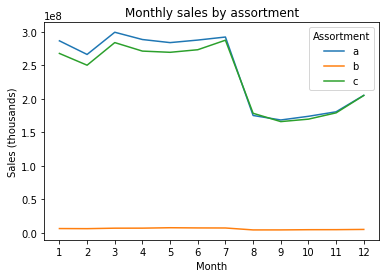

In [107]:
ax = pivot.plot(xticks=pivot.index, ylabel="Sales (thousands)", title="Monthly sales by assortment")
ax

Assortment type a and c performed very similarly, and experienced the same types of trends each month (a dip after July, climbing again towards the end of the year & peak holiday season). Assortment type b performed very poorly compared to types a and c, and stayed consistent throught the year - including during peak holiday times. 

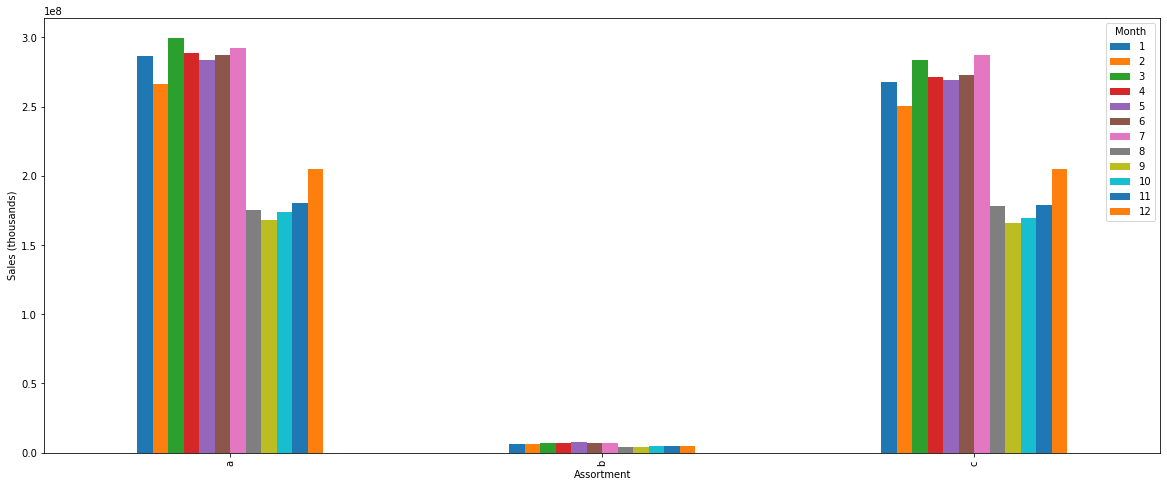

In [108]:
ax2 = pivot.T.plot(kind='bar', ylabel='Sales (thousands)', figsize=(20,8))

In [109]:
assort_b = data[(data["Assortment"]=='b')]
assort_b

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
258,259,5,2015-07-31,13611.5,1454,1,0,1,b,b,210.0,No Entry,No Entry,0,N/A,N/A,n/a,Friday,7,2015
273,274,5,2015-07-31,6975.0,1374,1,0,1,b,b,3640.0,No Entry,No Entry,1,10.0,2013.0,"jan,apr,jul,oct",Friday,7,2015
352,353,5,2015-07-31,7851.0,1454,1,0,1,b,b,900.0,No Entry,No Entry,1,14.0,2013.0,"feb,may,aug,nov",Friday,7,2015
511,512,5,2015-07-31,8548.0,1454,1,0,0,b,b,590.0,No Entry,No Entry,1,5.0,2013.0,"mar,jun,sept,dec",Friday,7,2015
675,676,5,2015-07-31,9974.0,1454,1,0,1,b,b,1410.0,9.0,2008.0,0,N/A,N/A,n/a,Friday,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016770,676,2,2013-01-01,3821.0,777,0,a,1,b,b,1410.0,9.0,2008.0,0,N/A,N/A,n/a,Tuesday,1,2013
1016827,733,2,2013-01-01,10765.0,1454,0,a,1,b,b,860.0,10.0,1999.0,0,N/A,N/A,n/a,Tuesday,1,2013
1016863,769,2,2013-01-01,5035.0,1248,0,a,1,b,b,840.0,No Entry,No Entry,1,48.0,2012.0,"jan,apr,jul,oct",Tuesday,1,2013
1017042,948,2,2013-01-01,4491.0,1039,0,a,1,b,b,1430.0,No Entry,No Entry,0,N/A,N/A,n/a,Tuesday,1,2013


In [110]:
arr20 = assort_b["Store"].values

In [111]:
arr21 = np.unique(arr20, return_counts=True)
arr21

(array([ 259,  274,  353,  512,  676,  733,  769,  948, 1097]),
 array([932, 932, 931, 745, 918, 942, 942, 927, 942]))

In [112]:
len(arr21[0])

9

Only 9 stores use assortment startegy B. This should be explored further - perhaps the location, or store size, dictates the number of products available. Or perhaps those 9 stores could change their assortment strategy to increase profits. 

### On the same line graph, plot all the sales for store 1, store 25 and store 827 that occurred in December of 2014:

In [113]:
store_1 = data[(data["Store"] == 1) & (data["Year"]==2014) & (data["Month"]==12)] #data for store 1 in December 2014
store_1

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
236380,1,3,2014-12-31,2605.0,327,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Wednesday,12,2014
237315,1,2,2014-12-30,6466.0,703,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Tuesday,12,2014
238250,1,1,2014-12-29,6463.0,700,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Monday,12,2014
240120,1,6,2014-12-27,6057.0,684,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Saturday,12,2014
242925,1,3,2014-12-24,3659.0,421,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Wednesday,12,2014
243860,1,2,2014-12-23,7959.0,957,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Tuesday,12,2014
244795,1,1,2014-12-22,9331.0,1080,0,0,1,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Monday,12,2014
246665,1,6,2014-12-20,8367.0,962,0,0,0,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Saturday,12,2014
247600,1,5,2014-12-19,7558.0,884,1,0,0,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Friday,12,2014
248535,1,4,2014-12-18,7785.0,841,1,0,0,c,a,1270.0,9.0,2008.0,0,N/A,N/A,n/a,Thursday,12,2014


In [114]:
store_25 = data[(data["Store"] == 25) & (data["Year"]==2014) & (data["Month"]==12)] #data for store 25 in December 2014
store_25

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
236401,25,3,2014-12-31,7771.0,925,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Wednesday,12,2014
237336,25,2,2014-12-30,13611.5,1454,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Tuesday,12,2014
238271,25,1,2014-12-29,12261.0,1454,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Monday,12,2014
240141,25,6,2014-12-27,10386.0,1337,0,0,0,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Saturday,12,2014
242946,25,3,2014-12-24,7858.0,978,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Wednesday,12,2014
243881,25,2,2014-12-23,13611.5,1454,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Tuesday,12,2014
244816,25,1,2014-12-22,13611.5,1454,0,0,1,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Monday,12,2014
246686,25,6,2014-12-20,11146.0,1454,0,0,0,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Saturday,12,2014
247621,25,5,2014-12-19,12900.0,1454,1,0,0,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Friday,12,2014
248556,25,4,2014-12-18,13611.5,1454,1,0,0,c,a,430.0,4.0,2003.0,0,N/A,N/A,n/a,Thursday,12,2014


In [115]:
store_827 = data[(data["Store"] == 827) & (data["Year"]==2014) & (data["Month"]==12)] #data for store 827 in December 2014
store_827

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dt_day,Month,Year
237067,827,3,2014-12-31,12013.0,1454,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Wednesday,12,2014
238002,827,2,2014-12-30,13611.5,1454,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Tuesday,12,2014
238937,827,1,2014-12-29,13611.5,1454,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Monday,12,2014
240807,827,6,2014-12-27,13611.5,1454,0,0,0,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Saturday,12,2014
243612,827,3,2014-12-24,7350.0,732,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Wednesday,12,2014
244547,827,2,2014-12-23,13611.5,1454,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Tuesday,12,2014
245482,827,1,2014-12-22,13611.5,1454,0,0,1,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Monday,12,2014
247352,827,6,2014-12-20,13611.5,1454,0,0,0,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Saturday,12,2014
248287,827,5,2014-12-19,13611.5,1454,1,0,0,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Friday,12,2014
249222,827,4,2014-12-18,13611.5,1454,1,0,0,a,c,250.0,1.0,2005.0,0,N/A,N/A,n/a,Thursday,12,2014


Text(0, 0.5, 'Sales')

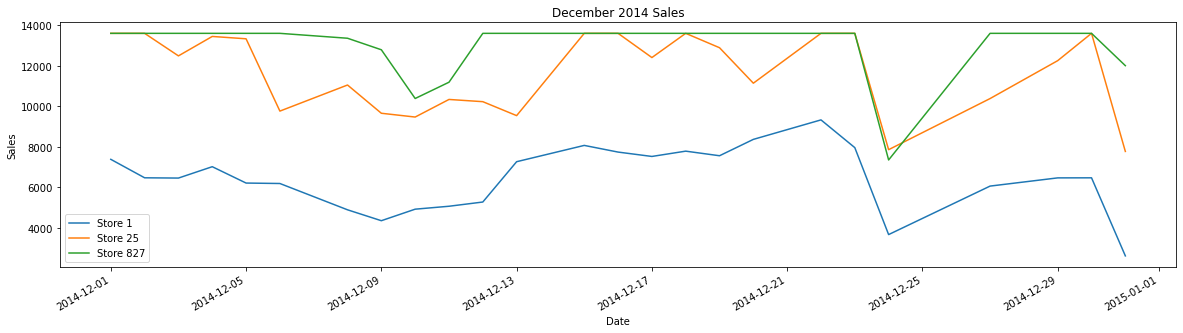

In [116]:
ax1 = store_1.plot(x="Date",y="Sales",label="Store 1", figsize = (20,5))
store_25.plot(x="Date",y="Sales",label="Store 25",ax=ax1)
store_827.plot(x="Date",y="Sales",label="Store 827",ax=ax1, title="December 2014 Sales")
plt.xlabel("Date")
plt.ylabel("Sales")

### Conclusion 

This dataset has now been cleaned and wrangled so that it may be accurately analysed and used to perform modelling and derive business conlusions in the next phase of the project. Steps taken include:

1. 'train' and 'store' datasets were merged into one dataset
2. unused rows (no sales) were removed
3. missing values were replaced with string identifiers 
4. dates were converted to datetime, and columns were added with datetime year, month and day for ease of use when filtering and modelling 
5. error rows were deleted 
6. unused columns were deleted (Open)
7. Outliers were imputed in order to limit their influence on central tendency calculations




### References 

Grindrod P and Moreno JB (2018) Code of Conduct, Code of conduct for Professional Data Scientists, accessed 25 March 2022. http://www.code-of-ethics.org/code-of-conduct/

Dataethics (2017) Data Ethics Principles, accesed 26 March 2022. https://dataethics.eu/data-ethics-principles/